In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor


In [2]:
housing = fetch_california_housing()

X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name="HousePrice")


In [4]:
X.head()
X.info()
X.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


In [8]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)


In [9]:
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


In [10]:
def evaluate_model(name, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} R² Score: {r2:.4f}")
    print("-" * 40)


In [11]:
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Decision Tree", y_test, y_pred_dt)


Linear Regression RMSE: 0.75
Linear Regression R² Score: 0.5758
----------------------------------------
Ridge Regression RMSE: 0.75
Ridge Regression R² Score: 0.5758
----------------------------------------
Decision Tree RMSE: 0.72
Decision Tree R² Score: 0.5997
----------------------------------------


In [12]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Decision Tree"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt))
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_dt)
    ]
})

results2


,Model,RMSE,R2 Score
0,Linear Regression,0.745581,0.575788
1,Ridge Regression,0.745557,0.575816
2,Decision Tree,0.724234,0.599732


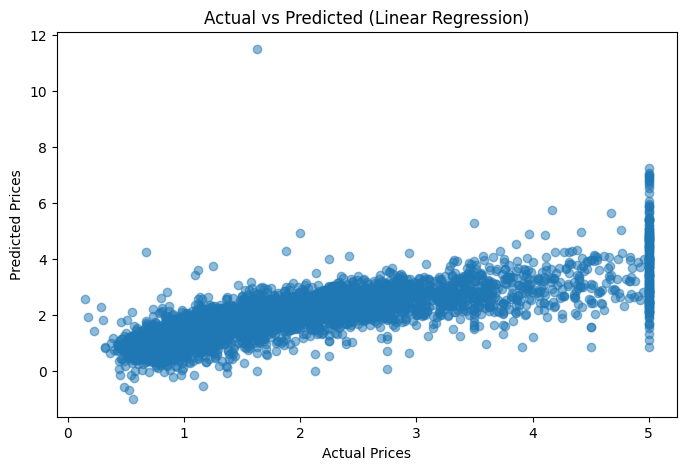

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted (Linear Regression)")==
plt.show()


## Conclusion

In this project, multiple regression models were implemented on the
California Housing dataset.

• Feature scaling was applied using StandardScaler  
• Linear, Ridge, and Decision Tree models were trained  
• Performance was evaluated using RMSE and R² score  

Among the models, Linear and Ridge Regression showed stable performance,
while Decision Tree captured non-linear patterns.

This project successfully demonstrates Feature Engineering,
Model Optimization, and Performance Comparison as required in AI/ML Task-2.
